In [2]:
import matplotlib.pyplot as plt
import numpy as np
from main import Model

In [3]:
def test_scatter(self, test_break):
    X = self.input[test_break[0]:test_break[1]]
    Y = [(activation(self.S, X[i:i+1], self.model, 1)[-1][0])
      for i in range(len(X))]

    Z = self.target[test_break[0]:test_break[1]]

    Y = pd.DataFrame(Y)
    Z = pd.DataFrame(Z)

    plot_target(Y, Z)

    return np.mean(np.sum(np.square(Z-Y), axis=0))

In [4]:
from dataset import normalize

def targetNormalize(target_data):
  data = target_data.copy()
  normalize(data)
  return data.to_numpy()

model = Model('./dataset/tp1_ej2_training.csv', (0, 8), (8, 10), targetNormalize)

In [23]:
def exp(S, max_epoch, lr, train_break, test_break, B):
    errors = model.train(S, max_epoch, lr, train_break, B)
    ecm, Y, Z = model.test(test_break)

    Z = Z[:20]
    Y = Y[:20]

    x = range(len(Z[0]))
    y = [(Z[0][i], Y[0][i]) for i in range(len(Z[0]))]#(1, 5), (1, 3), (2, 4), (2, 7)]


    plt.plot(x, [j for (i,j) in y], 'o', markersize = 4, label='Activación')
    plt.plot(x, [i for (i,j) in y], 'o', markersize = 4, label='Esperado')
    plt.legend()
    plt.plot((x,x), ([i for (i,j) in y], [j for (i,j) in y]), c='black')

    for i in range(len(x)):
      plt.text(x[i]+2.2, y[i][0] + (y[i][1] - y[i][0])/2, '%.3f'%(y[i][1] - y[i][0]), horizontalalignment='right')

    plt.xlabel('instancias')
    plt.ylabel('valor energético de calefacción')
    plt.show()
    
    print(ecm)

S: [8, 8, 2]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 2.155228353485737
epoch: 200; error: 1.3233172955789605
epoch: 300; error: 0.9961169373028579
epoch: 400; error: 0.8790659281701291
epoch: 500; error: 0.838496212878184
epoch: 600; error: 0.8127559247543508
epoch: 700; error: 0.8008315097437444
epoch: 800; error: 0.8078018245033716
epoch: 900; error: 0.8034246527679063
epoch: 1000; error: 0.7483998468359941
epoch: 1100; error: 0.7758956260411084
epoch: 1200; error: 0.7634478056114855
epoch: 1300; error: 0.7534193331332273
epoch: 1400; error: 0.7799956144673916
epoch: 1500; error: 0.7616797589482885
epoch: 1600; error: 0.7374705312540999
epoch: 1700; error: 0.748271080502147
epoch: 1800; error: 0.7599532105345786
epoch: 1900; error: 0.7299014786794201


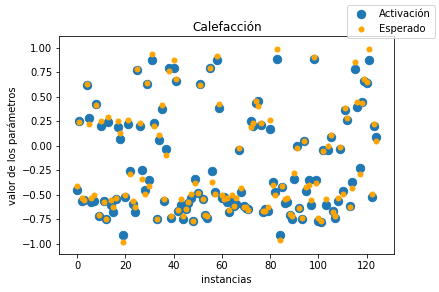

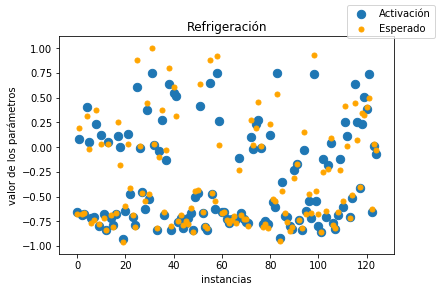

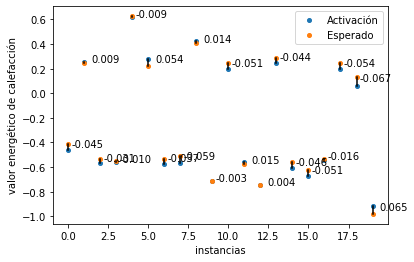

0.550948717035309


In [24]:
 exp(
    [8, 8, 2],
    2000,
    0.02,
    (0, 375),
    (375, 500),
    5
)